# **Cats_Vs_Dogs Convolution Neural Network**

Problem Statement: 

The task at hand involves classifying images of cats and dogs using a
Convolutional Neural Network (CNN). 

We have a dataset containing images of cats and dogs and the objective is to train a CNN model to accurately predict the
class of each image.

Objectives:

Data Preparation:

● Download and extract the cats vs. dogs dataset.

● Organize the dataset into a structured directory format suitable for
TensorFlow’s ImageDataGenerator.

● Split the dataset into training and testing sets.

Data Augmentation and Preprocessing: 

● Implement data augmentation techniques to increase the diversity of the
training dataset, aiding in the model's ability to generalize.

● Normalize the pixel values of the images for optimal model performance.
Model Building:

● Construct a Convolutional Neural Network using TensorFlow and Keras.

● The model should contain multiple convolutional layers, pooling layers, and
fully connected layers.

Training:

● Compile the model and train it on the prepared dataset.

● Utilize categorical cross entropy as the loss function and stochastic
gradient descent as the optimizer.

● Train the model for a sufficient number of epochs to achieve good
performance.

Evaluation:

● Evaluate the model's performance on the validation set during training to
monitor for overfitting.

● After training, assess the model's accuracy and make predictions on the
test set.

Prediction:

● Implement a system to make predictions on new images, categorizing
them as either cat or dog

The system should be able to take an image (or a batch of images),
preprocess it, and pass it through the model for predictions.

# Importing Libraries and Packages

In [14]:
! pip install Pillow

Defaulting to user installation because normal site-packages is not writeable


In [44]:
import numpy as np
import pandas as pd
import os
import zipfile

# for visualization
import matplotlib.pyplot as plt
import matplotlib.image as imread
from PIL import Image
import seaborn as sns

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import image_dataset_from_directory

In [34]:
! pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# Loading Files in Zip

In [17]:
from zipfile import ZipFile

data_path = 'dogs_vs_cats.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [18]:
path = 'dogs_vs_cats'
classes = os.listdir(path)
classes

['test', 'train']

# creating directories and dataframe

In [20]:
# directory path
train_dog_dir = 'dogs_vs_cats/train/dogs'
train_cat_dir = 'dogs_vs_cats/train/cats'
test_dog_dir = 'dogs_vs_cats/test/dogs'
test_cat_dir = 'dogs_vs_cats/test/cats'

# variable of directory
filenames_dog_train = os.listdir(train_dog_dir)
filenames_cat_train = os.listdir(train_cat_dir)
filenames_dog_test = os.listdir(test_dog_dir)
filenames_cat_test = os.listdir(test_cat_dir)

# creating a dataframe for easy access
data = pd.DataFrame({'dog_train' : filenames_dog_train, 'cat_train': filenames_cat_train})
data.head()

,dog_train,cat_train
0,dog.0.jpg,cat.0.jpg
1,dog.1.jpg,cat.1.jpg
2,dog.10.jpg,cat.100.jpg
3,dog.1000.jpg,cat.1000.jpg
4,dog.10000.jpg,cat.10002.jpg


# visualization of dogs

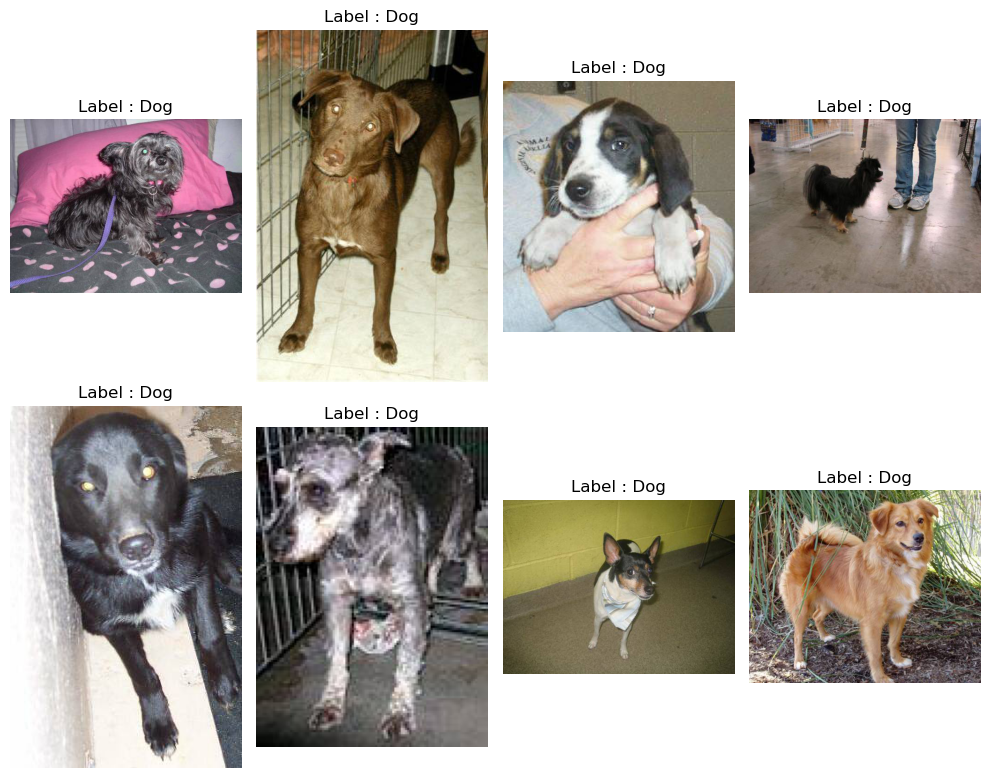

In [22]:
plt.figure(figsize=(10,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    image_path = 'dogs_vs_cats' + '/train' + '/dogs/' + str(data['dog_train'][i])
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Label : {"Dog"}")
    plt.axis('off')
plt.tight_layout()
plt.show()  

# visualization of cats

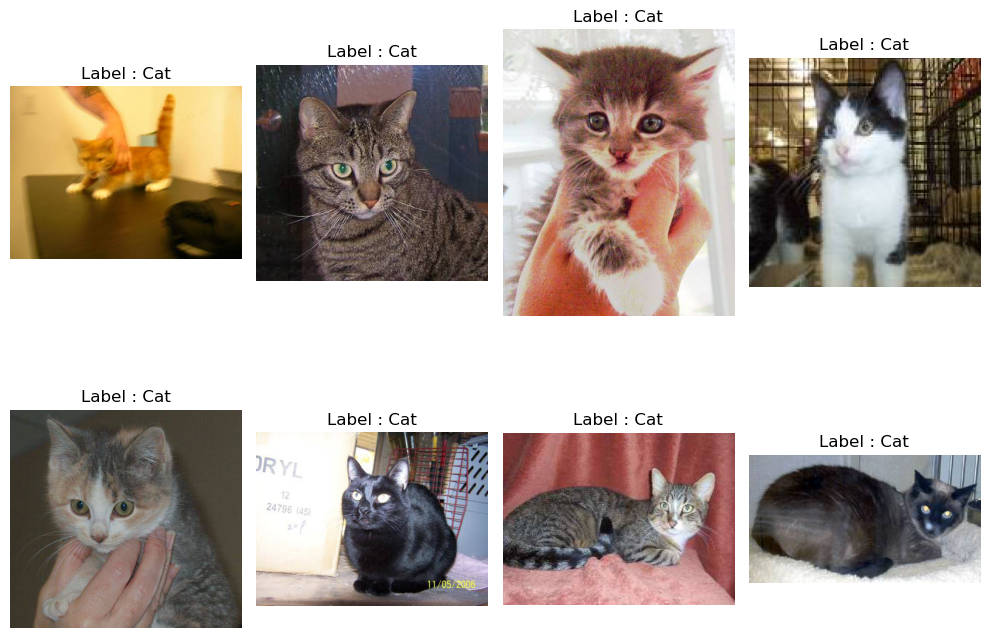

In [23]:
plt.figure(figsize=(10,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    image_path = 'dogs_vs_cats' + '/train' + '/cats/' + str(data['cat_train'][i])
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Label : {"Cat"}")
    plt.axis('off')
plt.tight_layout()
plt.show() 

# Normalization and Data Augmentation through ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

# Splitting the data into Training_set and Testing_set

In [24]:
# creating variables for directory of train and test
train_dir = 'dogs_vs_cats/train'
valid_dir = 'dogs_vs_cats/test'

training_set = train_datagen.flow_from_directory(directory=train_dir,
                                                    batch_size=32,              
                                                    target_size=(150,150),
                                                    class_mode='binary')


testing_set = test_datagen.flow_from_directory(directory=valid_dir,
                                                    batch_size=32,
                                                    shuffle=False,
                                                    target_size=(150,150),
                                                    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# Model Building

In [25]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    
    # Flatten Layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    # Output Layer   
    layers.Dense(1, activation='sigmoid')
])

In [26]:
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.20))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1,activation='sigmoid'))

# Compile of model

In [27]:
model.compile(
             loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

# Model Training

In [39]:
history = model.fit(training_set,
          epochs=5,
          validation_data=testing_set)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 654s 1s/step - accuracy: 0.6844 - loss: 0.6057 - val_accuracy: 0.6588 - val_loss: 0.6359
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 397s 635ms/step - accuracy: 0.7626 - loss: 0.4896 - val_accuracy: 0.7898 - val_loss: 0.4477
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 418s 668ms/step - accuracy: 0.7926 - loss: 0.4441 - val_accuracy: 0.6340 - val_loss: 0.7979
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 441s 704ms/step - accuracy: 0.8265 - loss: 0.3831 - val_accuracy: 0.7294 - val_loss: 0.5228
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 402s 643ms/step - accuracy: 0.8525 - loss: 0.3450 - val_accuracy: 0.8028 - val_loss: 0.4551


# Saving model 

In [40]:
model.save('DOGS-VS-CATS-CNN-MODEL.h5')

# Evaluate

In [41]:
loss , accuracy = model.evaluate(testing_set)
print(f"Accuracy : {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.6991 - loss: 0.6764
Accuracy : 0.8028


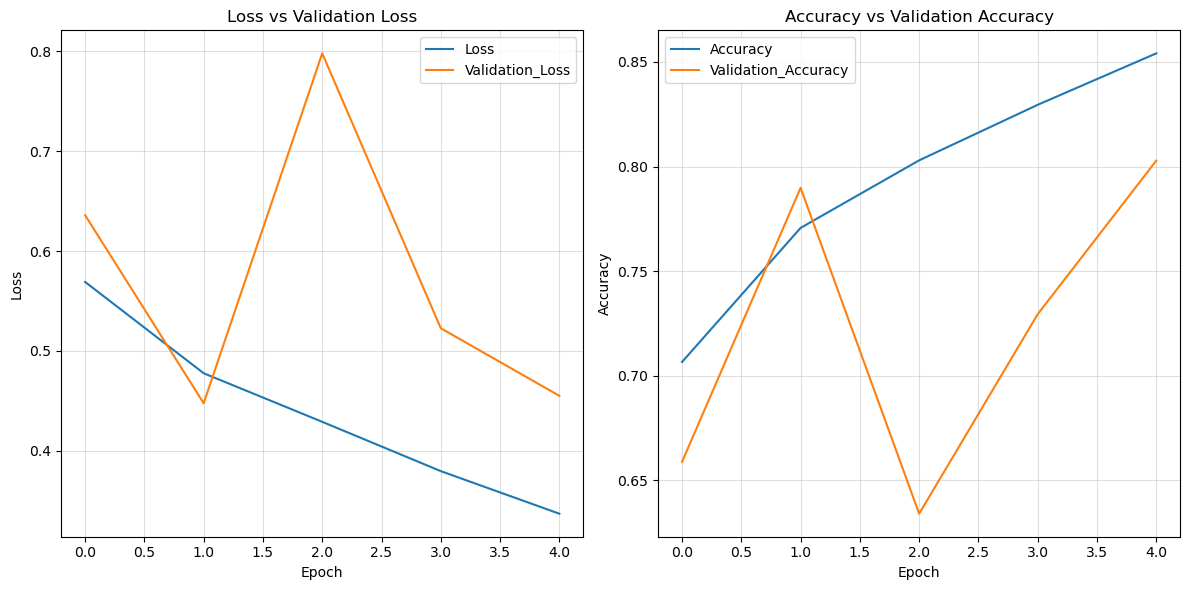

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Validation_Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Validation Loss") 
plt.legend()
plt.grid(alpha=0.40)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation_Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Validation Accuracy") 
plt.legend()
plt.grid(alpha=0.40)
plt.tight_layout()
plt.show()

# Testing 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Dog


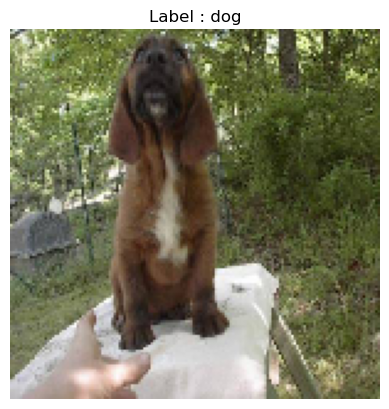

In [52]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    plt.imshow(img)
    plt.title(f"Label : {image_path.split('/')[2][0:3]}")
    plt.axis('off')
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")

predict_image('dogs_vs_cats/test/dogs/dog.5.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Cat


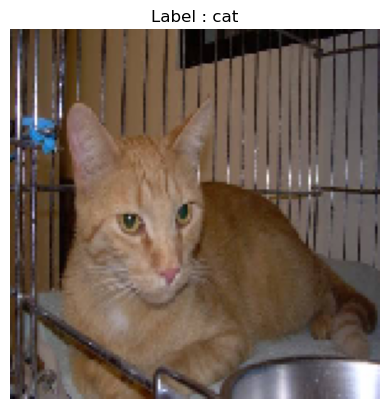

In [53]:
predict_image('dogs_vs_cats/test/cats/cat.83.jpg')